In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
import pybevy as pb

sim_params = dict(
    n_hosts=5,
    max_days=3*365,
    incidence_rate=0.02,
    log10_dose=6.0,
)

In [3]:
data_3d = pb.run_bevy_app(sim_params)  # n_agents, n_days, n_channels, 

In [4]:
dims = ["entity", "day", "channel"]

entity_coords = np.arange(sim_params["n_hosts"])
day_coords = np.arange(sim_params["max_days"]+1)
channel_coords = ["current_immunity", "viral_shed"]

data_xr = xr.DataArray(data_3d, coords={
    "entity": entity_coords,
    "day": day_coords,
    "channel": channel_coords,
}, dims=dims)

# print(data_xr)

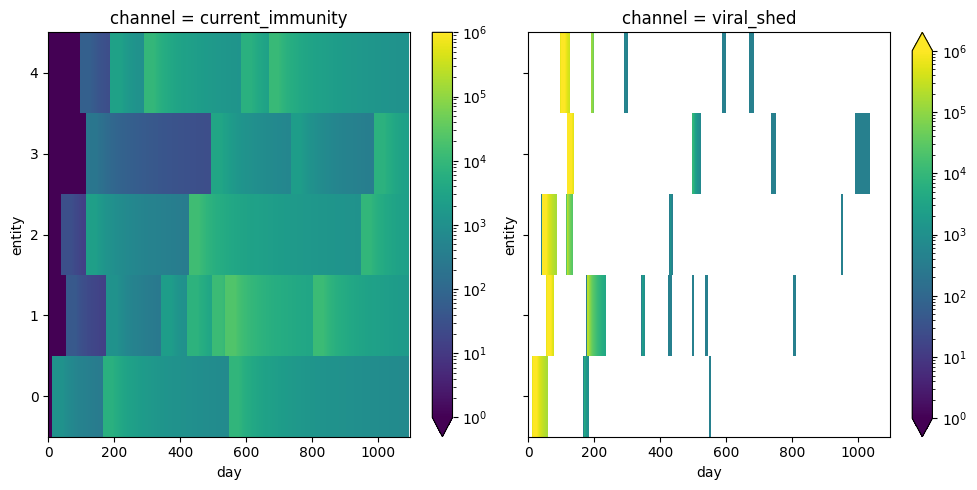

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
data_xr.sel(channel='current_immunity').plot(norm=colors.LogNorm(vmin=1, vmax=1e6), ax=axs[0])
data_xr.sel(channel='viral_shed').plot(norm=colors.LogNorm(vmin=1, vmax=1e6), ax=axs[1])
fig.set_tight_layout(True)

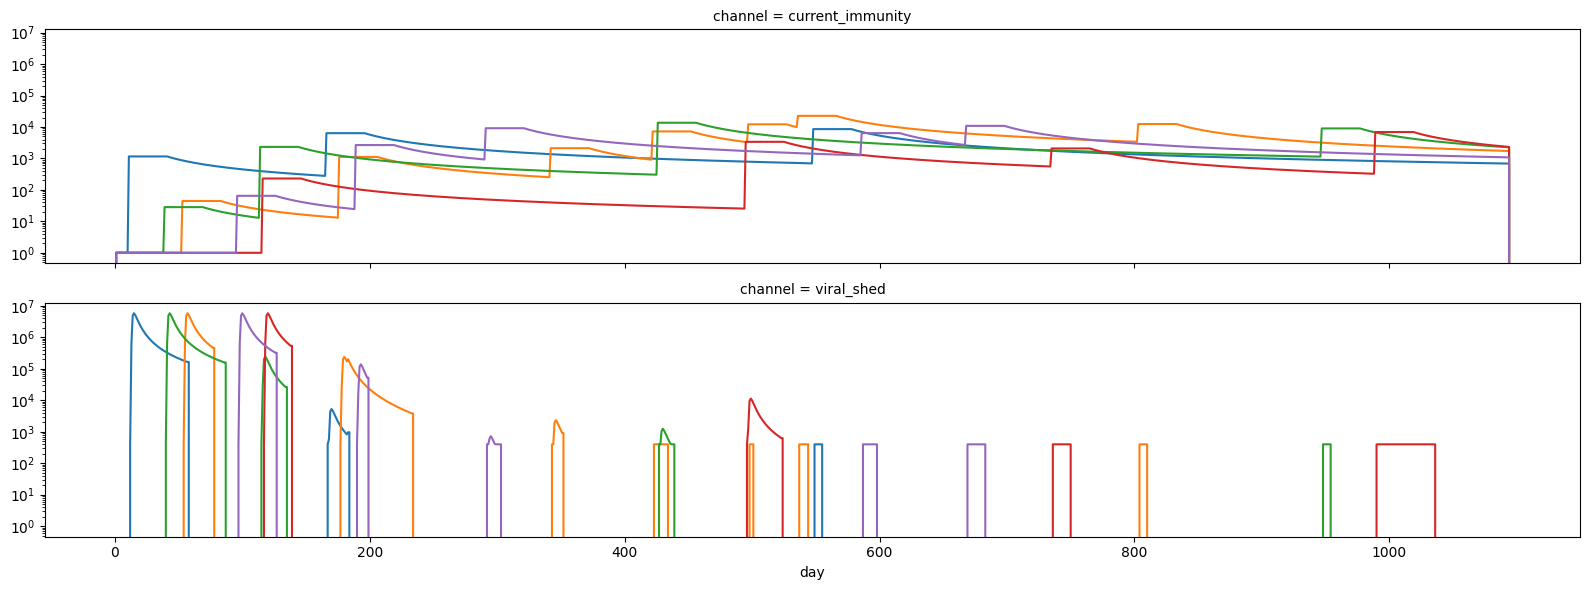

In [6]:
data_xr.plot.line(x='day', row='channel', aspect=5, size=3, add_legend=False, yscale='log')